In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
# add dithering module to path and load it
sys.path.append('./../../py')
import peakFinder
import extract_spectrum

In [8]:
wlens, fluxes = extract_spectrum.get_random_spectrum("QSO_SOUTH")
bkg = peakFinder.snip(fluxes, 10, 9)
source = fluxes-bkg

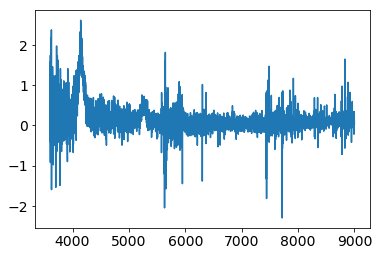

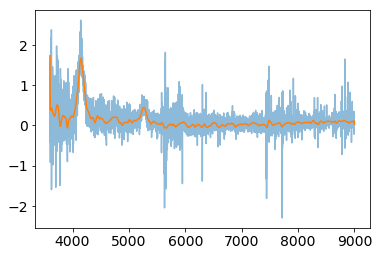

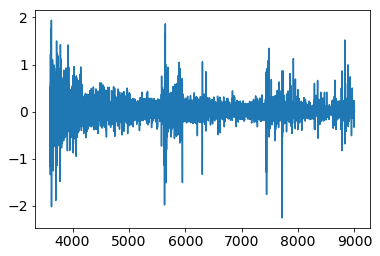

In [9]:
plt.plot(wlens, fluxes)
plt.show()

plt.clf()
plt.plot(wlens, fluxes, alpha=0.5)
plt.plot(wlens, bkg)
plt.show()

plt.clf()
plt.plot(wlens, source)
plt.show()

FDR says the threshold needs to be at 0.7894771467879393


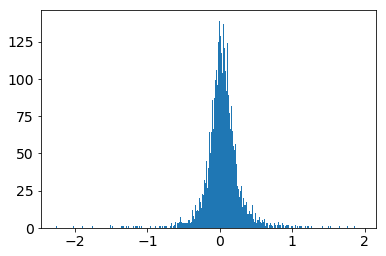

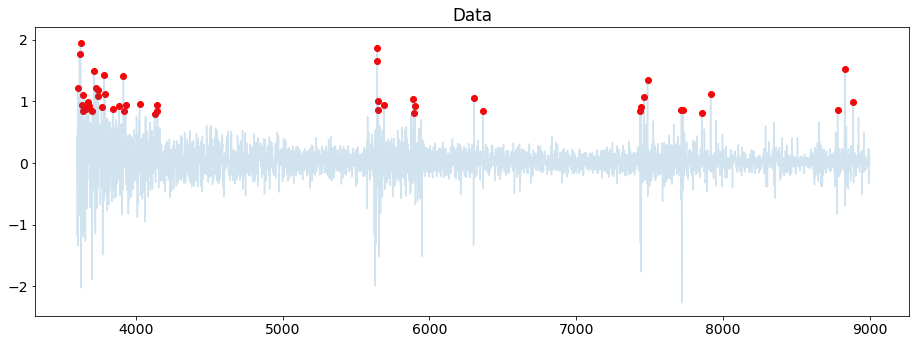

In [11]:
ssize  = len(fluxes)
sigma  = .2
decon_iterations = 10
max_peak = 50
threshold = peakFinder.get_FDR_threshold(source)
peak_pos = peakFinder.search_peak(source, ssize, sigma,
                                  threshold, decon_iterations,
                                  max_peak)
wlens = np.array(wlens)
source = np.array(source)
fig, axes = plt.subplots(1, 1, figsize=(13, 5))
axes.plot(wlens, source, alpha=0.2)
axes.scatter(wlens[peak_pos], source[peak_pos], color = 'r')
axes.set(title = 'Data')
fig.tight_layout()
plt.show()
